In [49]:
import sys
import traceback
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import xarray as xr
import scipy.stats as stats
from metpy.cbook import get_test_data
import netCDF4 as nc  

import pyOptimalEstimation as pyOE

%matplotlib inline
sns.set(style='ticks', palette='deep')


sys.path.append('lib')
import nonScatMWRadTran
import supporting_routines

In [50]:
prior = xr.open_dataset("E:/SAMEER/pyOptimalEstimation_examples-master/pyOptimalEstimation_examples-master/data/THIRUVANANTHAPURAM_IGRA.nc", engine='netcdf4')
prior

<xarray.Dataset>
Dimensions:   (time: 10157, height: 20)
Coordinates:
  * time      (time) datetime64[ns] 2083-05-02T10:00:00 ... 2084-04-28T18:00:00
  * height    (height) float64 0.0 148.6 561.8 ... 6.929e+03 7.06e+03 7.21e+03
Data variables:
    temp      (time, height) float64 ...
    q         (time, height) float64 ...
    bar_pres  (time, height) float64 ...

In [51]:
prior.bar_pres

<xarray.DataArray 'bar_pres' (time: 10157, height: 20)>
[203140 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2083-05-02T10:00:00 ... 2084-04-28T18:00:00
  * height   (height) float64 0.0 148.6 561.8 ... 6.929e+03 7.06e+03 7.21e+03
Attributes:
    long_name:  Pressure in Pa
    units:      Pa

In [52]:


import pandas as pd

# Assuming new_df is your DataFrame with a column named 'time'

# Convert the DataFrame to a table format
# table1 = pd.DataFrame({'time': prior['time']})
table1= pd.DataFrame (prior.bar_pres)

# Display the table

print(table1)
table1

             0         1         2        3        4        5        6   \
0      100200.0  100000.0   97300.0  92500.0  85000.0  79900.0  77200.0   
1      100200.0  100000.0   97300.0  92500.0  85000.0  78900.0  71000.0   
2       96900.0   92500.0   85000.0  77200.0  70000.0  60000.0  58800.0   
3       92500.0   85100.0   85000.0  76900.0  70000.0  66100.0  60200.0   
4      100100.0  100000.0   92500.0  86400.0  85000.0  74200.0  71900.0   
...         ...       ...       ...      ...      ...      ...      ...   
10152  100300.0  100000.0   92500.0  86000.0  85000.0  82900.0  71700.0   
10153  100500.0  100000.0   99300.0  92500.0  85000.0  81700.0  74900.0   
10154  100300.0  100100.0  100000.0  99600.0  98500.0  92500.0  85000.0   
10155  100400.0  100000.0   98900.0  92500.0  85000.0  77000.0  74500.0   
10156  100500.0  100400.0  100000.0  97900.0  92500.0  85000.0  80900.0   

            7        8        9        10       11       12       13       14  \
0      72500.0  70

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,100200.0,100000.0,97300.0,92500.0,85000.0,79900.0,77200.0,72500.0,70000.0,67800.0,60700.0,60000.0,59400.0,52000.0,50000.0,40000.0,39300.0,32800.0,30000.0,NaN
1,100200.0,100000.0,97300.0,92500.0,85000.0,78900.0,71000.0,70000.0,68400.0,65600.0,61000.0,60000.0,59300.0,56300.0,54400.0,52400.0,50000.0,46000.0,40600.0,40000.0
2,96900.0,92500.0,85000.0,77200.0,70000.0,60000.0,58800.0,56400.0,50000.0,48800.0,40000.0,34500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,92500.0,85100.0,85000.0,76900.0,70000.0,66100.0,60200.0,60000.0,56600.0,54200.0,50000.0,44200.0,40000.0,30000.0,26200.0,NaN,NaN,NaN,NaN,NaN
4,100100.0,100000.0,92500.0,86400.0,85000.0,74200.0,71900.0,70000.0,65200.0,63000.0,60000.0,58200.0,56700.0,50000.0,43300.0,40000.0,39600.0,30700.0,30000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10152,100300.0,100000.0,92500.0,86000.0,85000.0,82900.0,71700.0,70000.0,68000.0,57200.0,55900.0,50000.0,48400.0,48000.0,47500.0,46300.0,41300.0,40000.0,36500.0,30000.0
10153,100500.0,100000.0,99300.0,92500.0,85000.0,81700.0,74900.0,70000.0,55400.0,50000.0,43800.0,42400.0,40000.0,36400.0,33500.0,31500.0,30000.0,NaN,NaN,NaN
10154,100300.0,100100.0,100000.0,99600.0,98500.0,92500.0,85000.0,79600.0,79300.0,77700.0,76600.0,74000.0,73100.0,70000.0,69400.0,68100.0,66600.0,64800.0,63800.0,63500.0
10155,100400.0,100000.0,98900.0,92500.0,85000.0,77000.0,74500.0,70000.0,66800.0,65700.0,59200.0,50000.0,40000.0,38900.0,35400.0,30000.0,29700.0,NaN,NaN,NaN


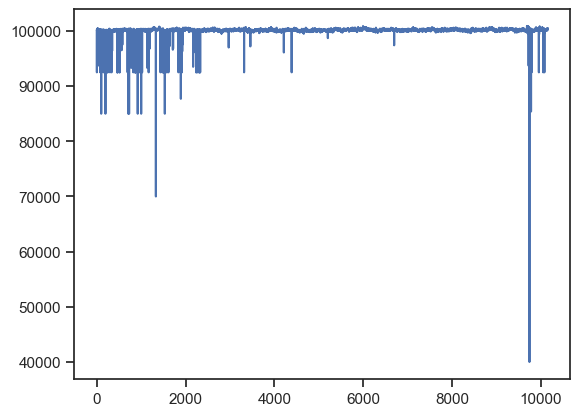

In [53]:
plt.plot(table1[0])

In [54]:
prior.q

<xarray.DataArray 'q' (time: 10157, height: 20)>
[203140 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2083-05-02T10:00:00 ... 2084-04-28T18:00:00
  * height   (height) float64 0.0 148.6 561.8 ... 6.929e+03 7.06e+03 7.21e+03
Attributes:
    long_name:  Relative humidity
    units:      %

In [55]:
prior.temp

<xarray.DataArray 'temp' (time: 10157, height: 20)>
[203140 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2083-05-02T10:00:00 ... 2084-04-28T18:00:00
  * height   (height) float64 0.0 148.6 561.8 ... 6.929e+03 7.06e+03 7.21e+03
Attributes:
    long_name:  temperature
    units:      K

In [56]:
import pandas as pd

# Specify the path to your CSV file with escaped backslashes
csv_file_path = "C:\\Users\\angsh\\Downloads\\THIRUVANANTHAPURAM_IGRA_DATES.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the DataFrame
print(df)


              Test_time
0      01-01-2000 00:00
1      03-01-2000 00:00
2      07-01-2000 11:00
3      15-01-2000 11:00
4      16-01-2000 00:00
...                 ...
10152  19-10-2023 00:00
10153  20-10-2023 00:00
10154  21-10-2023 00:00
10155  22-10-2023 00:00
10156  23-10-2023 00:00

[10157 rows x 1 columns]


In [57]:
import pandas as pd
import xarray as xr

# Read the CSV file into a pandas DataFrame
csv_file_path = "C:\\Users\\angsh\\Downloads\\THIRUVANANTHAPURAM_IGRA_DATES.csv"
df = pd.read_csv(csv_file_path)

# Convert the 'Test_time' column to datetime64
df['Test_time'] = pd.to_datetime(df['Test_time'], format='%d-%m-%Y %H:%M')

# Assuming you have already loaded your data into prior
# prior: xarray.Dataset

# Make sure that df is sorted by 'Test_time'
df = df.sort_values(by='Test_time')

# If 'time' is already a coordinate in prior and you want to replace its values,
# you can use the .assign_coords() method instead of direct assignment:
prior = prior.assign_coords(time=df['Test_time'])
# prior = prior.assign_coords(time=df.index)
prior = prior.assign_coords(height=prior.height)


# Now the 'time' coordinate in prior has been replaced with the 'Test_time' values from df
prior

<xarray.Dataset>
Dimensions:   (time: 10157, height: 20)
Coordinates:
  * time      (time) datetime64[ns] 2000-01-01 2000-01-03 ... 2023-10-23
  * height    (height) float64 0.0 148.6 561.8 ... 6.929e+03 7.06e+03 7.21e+03
Data variables:
    temp      (time, height) float64 ...
    q         (time, height) float64 ...
    bar_pres  (time, height) float64 1.002e+05 1e+05 9.73e+04 ... nan nan nan

In [58]:
prior.height

<xarray.DataArray 'height' (height: 20)>
array([   0.      ,  148.617585,  561.827332, 1091.498801, 1821.806444,
       2595.033562, 3289.815378, 3482.059528, 3393.251199, 3873.176022,
       4350.155713, 4827.952778, 5297.217167, 5748.075322, 6145.229984,
       6485.283378, 6718.112259, 6928.995336, 7060.352924, 7209.607584])
Coordinates:
  * height   (height) float64 0.0 148.6 561.8 ... 6.929e+03 7.06e+03 7.21e+03
Attributes:
    long_name:  height
    units:      m

In [59]:
sorted_prior_height = prior.height.sortby('height')
sorted_prior = prior.sel(height=sorted_prior_height)
sorted_prior.height

<xarray.DataArray 'height' (height: 20)>
array([   0.      ,  148.617585,  561.827332, 1091.498801, 1821.806444,
       2595.033562, 3289.815378, 3393.251199, 3482.059528, 3873.176022,
       4350.155713, 4827.952778, 5297.217167, 5748.075322, 6145.229984,
       6485.283378, 6718.112259, 6928.995336, 7060.352924, 7209.607584])
Coordinates:
  * height   (height) float64 0.0 148.6 561.8 ... 6.929e+03 7.06e+03 7.21e+03
Attributes:
    long_name:  height
    units:      m

In [60]:

abcheight = sorted_prior.height
abcheight
prior = prior.assign_coords(height=abcheight)
prior

<xarray.Dataset>
Dimensions:   (time: 10157, height: 20)
Coordinates:
  * time      (time) datetime64[ns] 2000-01-01 2000-01-03 ... 2023-10-23
  * height    (height) float64 0.0 148.6 561.8 ... 6.929e+03 7.06e+03 7.21e+03
Data variables:
    temp      (time, height) float64 ...
    q         (time, height) float64 ...
    bar_pres  (time, height) float64 1.002e+05 1e+05 9.73e+04 ... nan nan nan

In [61]:
# import pandas as pd

# # Assuming new_df is your DataFrame with a column named 'time'

# # Convert the DataFrame to a table format
# table = pd.DataFrame({'time': prior['time']})

# # Display the table

# print(table)
# table

In [62]:
# import pandas as pd

# # Assuming 'table' is your DataFrame with a column named 'time'

# # Step 1: Get unique dates
# unique_dates = table['time'].unique()

# # Step 2: Randomly select 5 unique dates
# random_dates = pd.Series(unique_dates).sample(n=8, random_state=42)  # Set random_state for reproducibility

# print(random_dates)


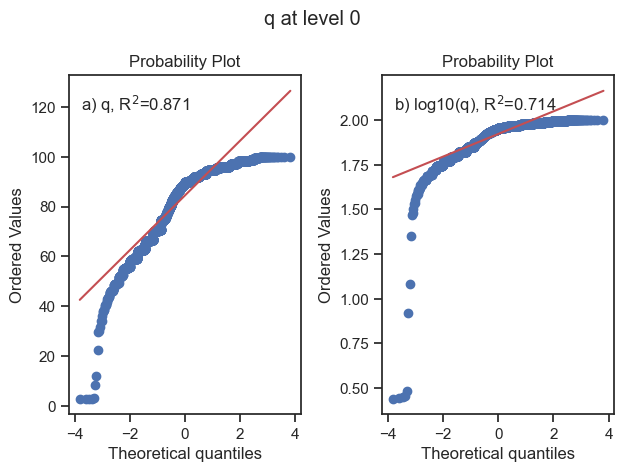

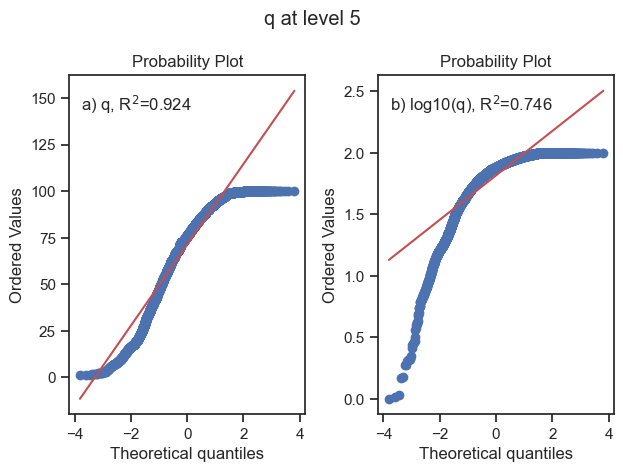

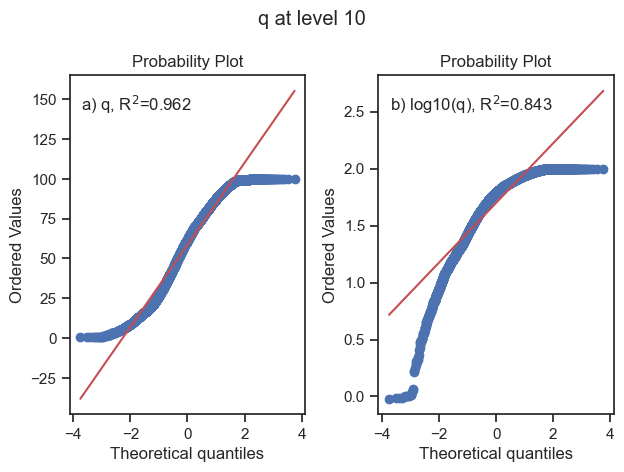

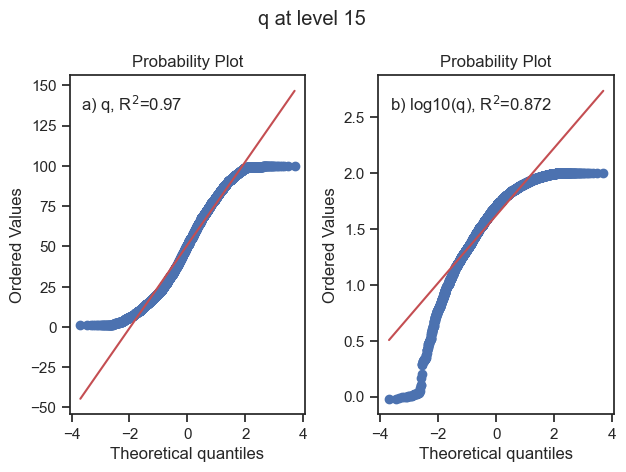

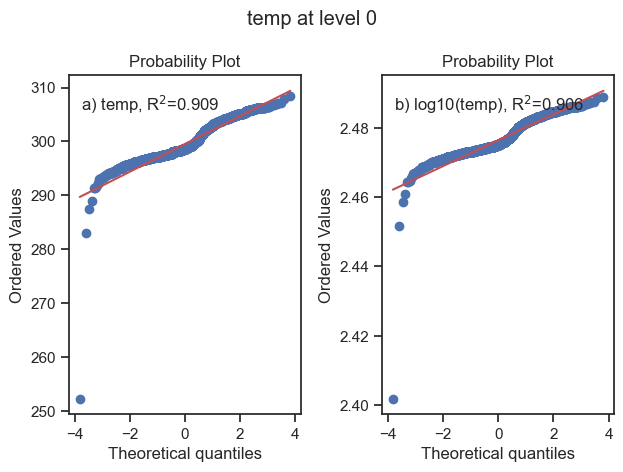

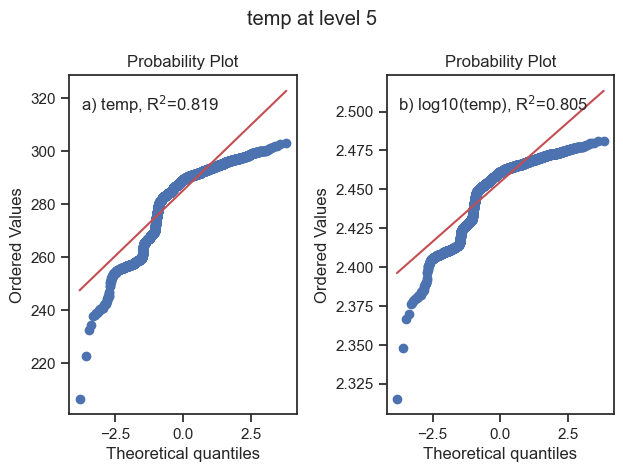

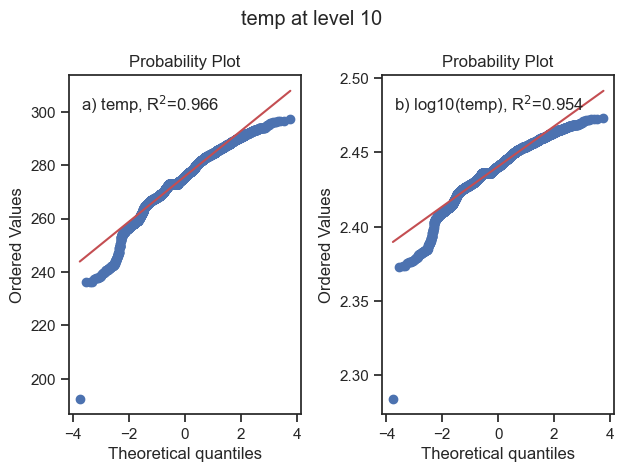

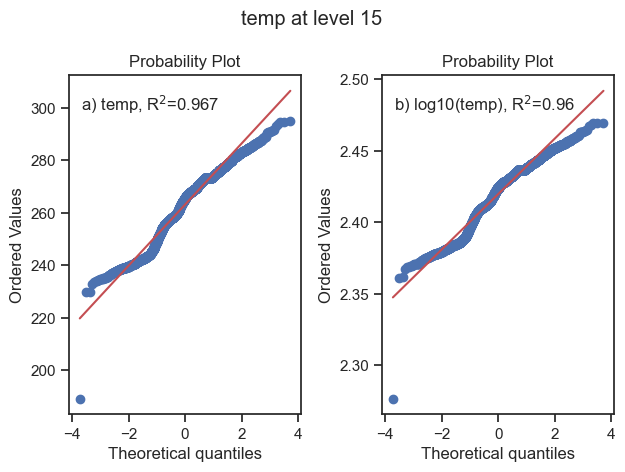

In [63]:
for var in ['q', 'temp']:
    for h in range(0, 20, 5):
        fig, (ax, ax1) = plt.subplots(ncols=2)
        plt.suptitle('%s at level %i' % (var,h))
        (osm, osr), (slope, intercept, r) = stats.probplot(
            prior[var].isel(height=h).dropna('time').values,
            dist="norm",
            plot=ax,
            fit=True,
            rvalue=False)
        ax.text(
            0.05,
            0.95,
            '%s) %s, R$^2$=%.3g' % ('a', var, r**2),
            horizontalalignment='left',
            verticalalignment='top',
            transform=ax.transAxes)

        (osm, osr), (slope, intercept, r) = stats.probplot(
            np.log10(prior[var].isel(height=h).dropna('time').values),
            dist="norm",
            plot=ax1,
            fit=True,
            rvalue=False)
        ax1.text(
            0.05,
            0.95,
            '%s) %s, R$^2$=%.3g' % ('b', 'log10(%s)'%var, r**2),
            horizontalalignment='left',
            verticalalignment='top',
            transform=ax1.transAxes)
        fig.tight_layout()

In [64]:
import numpy as np
import pandas as pd

# Assuming 'prior' is your pandas DataFrame
prior['q'] = np.log10(prior['q'])



In [65]:
prior['q']

<xarray.DataArray 'q' (time: 10157, height: 20)>
array([[1.9576267 , 1.96029006, 1.99737058, ...,        nan,        nan,
               nan],
       [1.96836355, 1.96040963, 1.83791638, ...,        nan, 1.61870161,
        1.6565539 ],
       [1.78583004, 1.81796164, 1.87715293, ...,        nan,        nan,
               nan],
       ...,
       [1.99223482, 1.98433553, 1.98433553, ..., 1.84719884, 1.52123405,
        1.13068978],
       [1.98710617, 1.9922464 , 1.94836636, ...,        nan,        nan,
               nan],
       [1.98177261, 1.95543348, 1.93965832, ...,        nan,        nan,
               nan]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-03 ... 2023-10-23
  * height   (height) float64 0.0 148.6 561.8 ... 6.929e+03 7.06e+03 7.21e+03
Attributes:
    long_name:  Relative humidity
    units:      %

In [66]:
profileTT = np.array([
    '2018-12-23T00:00:00.000000000', '2022-06-25T00:00:00.000000000',
    '2023-10-06T00:00:00.000000000', '2011-11-03T00:00:00.000000000',
     ],dtype='datetime64[ns]')
profiles = prior.sel(time=profileTT)
prior = prior.drop_sel(time=profileTT)
nLev = len(prior.height)
nLev

# 02-02-2000 00:00
# 02-02-2000 12:00
# 03-02-2000 00:00
# 03-02-2000 12:00
# 04-02-2000 00:00
# 04-02-2000 12:00
# 05-02-2000 00:00
# 05-02-2000 12:00

#    2008-10-14 00:00:00
#   2004-05-29 12:00:00
#   2015-09-21 12:00:00
#   2000-07-22 12:00:00
#    2000-06-13 12:00:00
#      2018-03-10 12:00:00
# 2008-08-14 12:00:00 

# '2008-08-14T12:00:00.000000000',


# profileTT = np.array([
#     '2017-12-21T12:00:00.000000000', '2004-05-23T00:00:00.000000000',
#    '2001-06-06T12:00:00.000000000', '2011-11-03T00:00:00.000000000',
#      ],dtype='datetime64[ns]')

20

In [67]:
priors = {'all': prior}

seasons = [
    'DJF',
    'MAM',
    'JJA',
    'SON',
]
months = (
    [12, 1, 2],
    [3, 4, 5],
    [6, 7, 8],
    [9, 10, 11],
)
for season, month in zip(seasons, months):
    priors[season] = prior.where(
        np.in1d(prior['time.month'], month)[:, np.newaxis]).dropna(
            'time', how='all')

In [68]:
# prior_qts = {}
# for season in priors.keys():
#     prior_q = priors[season]['q'].to_pandas()
#     prior_q.columns = ['%05i_q' % (i) for i in prior_q.columns]
#     prior_t = priors[season]['temp'].to_pandas()
#     prior_t.columns = ['%05i_t' % (i) for i in prior_t.columns]
#     prior_qts[season] = pd.concat((prior_q, prior_t), axis=1)
#     prior_qts[season] = prior_qts[season].reindex(
#         sorted(prior_qts[season].columns), axis=1)

# prior_qts

prior_qts = {}
for season in priors.keys():
    prior_q = priors[season]['q'].to_pandas()
    prior_q.columns = ['%05i_q' % (i) for i in prior_q.columns]
    prior_t = priors[season]['temp'].to_pandas()
    prior_t.columns = ['%05i_t' % (i) for i in prior_t.columns]
    prior_qts[season] = pd.concat((prior_q, prior_t), axis=1)
    prior_qts[season] = prior_qts[season].reindex(
        sorted(prior_qts[season].columns), axis=1)

prior_qts

{'all':                       00000_q  00000_t   00148_q  00148_t   00561_q  00561_t  \
 time                                                                           
 2000-01-01 00:00:00  1.957627   295.95  1.960290   295.95  1.997371   296.15   
 2000-01-03 00:00:00  1.968364   296.35  1.960410   296.35  1.837916   295.55   
 2000-01-07 11:00:00  1.785830   297.75  1.817962   295.15  1.877153   290.45   
 2000-01-15 11:00:00  1.865141   295.25  1.972552   290.95  1.969796   290.95   
 2000-01-16 00:00:00  1.965971   297.35  1.963285   297.15  1.834656   292.95   
 ...                       ...      ...       ...      ...       ...      ...   
 2023-10-19 00:00:00  1.992235   298.35  1.979130   297.55  1.970614   294.55   
 2023-10-20 00:00:00  1.981745   297.55  1.841321   298.35  1.787446   298.75   
 2023-10-21 00:00:00  1.992235   298.35  1.984336   297.35  1.984336   297.35   
 2023-10-22 00:00:00  1.987106   298.95  1.992246   298.55  1.948366   299.55   
 2023-10-23 00:00:00 

In [69]:
x_cov = []
x_mean = []

for season in ['all'] + seasons:

    x_cov1 = prior_qts[season].cov().rename_axis('state', axis=0).rename_axis('stateT', axis=1)
    x_mean1 = prior_qts[season].mean().rename_axis('state', axis=0)

    x_cov.append(xr.DataArray(x_cov1))
    x_mean.append(xr.DataArray(x_mean1))

x_cov = xr.concat(x_cov, dim='season')
x_mean = xr.concat(x_mean, dim='season')

x_cov['season'] = ['all'] + seasons
x_mean['season'] = ['all'] + seasons

In [70]:
for season in x_cov.season:
    assert np.linalg.matrix_rank(x_cov.sel(season=season).to_pandas()) ==  x_cov.shape[-1]

Text(0, 0.5, 'Height [m]')

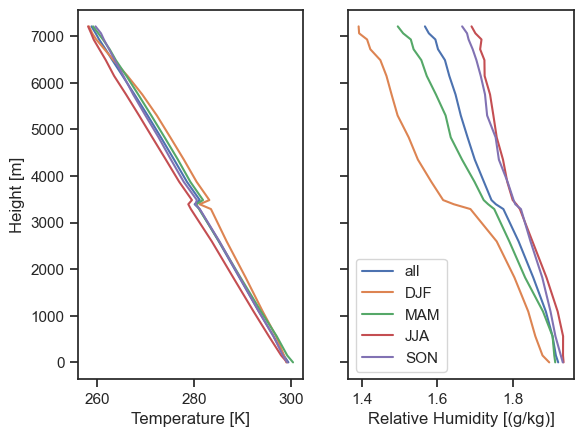

In [71]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
for season in ['all'] + seasons:
    t, q = supporting_routines.splitTQ(x_mean.sel(season=season).to_pandas())
    ax1.plot(t, t.index, label=season)
    ax2.plot(q, q.index, label=season)

ax2.legend()
ax1.set_xlabel('Temperature [K]')
ax2.set_xlabel('Relative Humidity [(g/kg)]')
ax1.set_ylabel('Height [m]')

Text(0.5, 1.0, '$\\mathbb{S}_{a}$ Humidity')

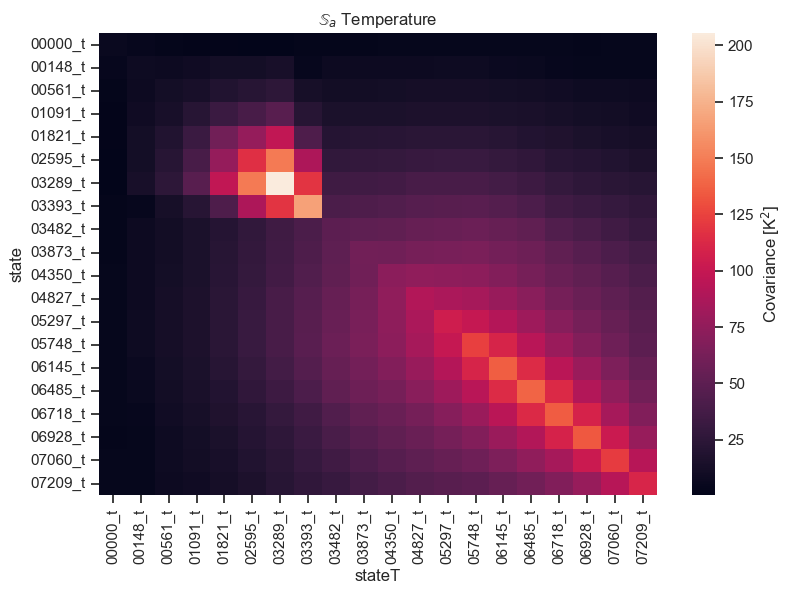

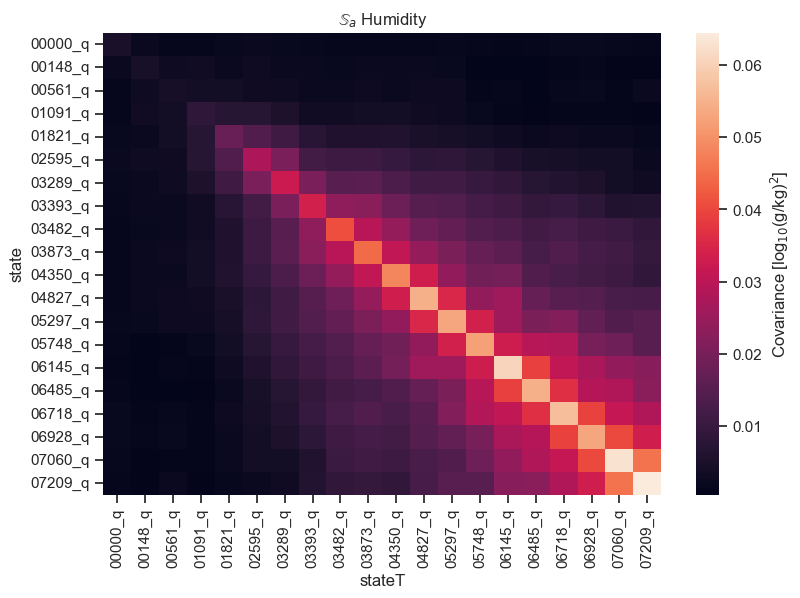

In [72]:
S_a = x_cov.sel(season='JJA').to_pandas()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(S_a.iloc[1::2, 1::2], ax=ax, cbar_kws={'label':'Covariance [K$^2$]'})
ax.set_title('$\mathbb{S}_{a}$ Temperature')
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(S_a.iloc[::2, ::2], ax=ax, cbar_kws={'label':'Covariance [log$_{10}$(g/kg)$^2$]'})
ax.set_title('$\mathbb{S}_{a}$ Humidity')

In [73]:
height = priors['all'].height

pressure = []
for k in ['all'] + seasons:
    pressure.append(priors[k].bar_pres.mean('time'))
pressure = xr.concat(pressure, dim='season')
pressure['season'] = ['all'] + seasons
pressure = pressure.to_pandas()
pressure

height,0.000000,148.617585,561.827332,1091.498801,1821.806444,2595.033562,3289.815378,3393.251199,3482.059528,3873.176022,4350.155713,4827.952778,5297.217167,5748.075322,6145.229984,6485.283378,6718.112259,6928.995336,7060.352924,7209.607584
season,,,,,,,,,,,,,,,,,,,,
all,100084.291342,98458.471237,93970.610837,88593.165680,81925.867352,75521.576599,70211.822267,68241.484341,67857.158019,64120.506749,60597.377831,57244.547536,54101.837560,51218.528302,48753.709316,46696.635145,45285.003904,44029.461162,43213.580470,42312.284393
DJF,100211.152790,99204.162855,95351.784081,90696.289510,84756.029344,78780.000000,73872.693556,70446.621945,70824.000000,66892.188336,63191.348737,59609.815618,56245.609221,52920.355951,49860.557769,47138.622754,45348.199083,43868.914956,42965.165675,42227.127127
MAM,99959.761905,97906.507937,93346.825397,87731.758634,80937.729084,74588.124750,69485.304804,68237.411661,68326.943765,64719.400786,61279.762494,57880.997506,54722.104198,51837.907820,49343.807463,47215.851003,45864.775174,44480.613668,43420.476935,42374.893428
JJA,100061.968839,98098.441926,93073.999292,87287.224982,80095.554765,73323.367820,67675.761922,66057.355243,65449.034749,61818.550475,58311.642050,55037.598598,52002.896613,49278.853211,46933.301018,45248.235914,43941.583578,42854.600000,42223.478939,41482.454545
SON,100122.237896,98755.034325,94384.128195,89073.664122,82482.287682,76062.279355,70588.425926,68650.972280,67448.811126,63642.015295,60169.129646,56967.158672,53902.688679,51205.095541,49128.541667,47321.343874,46088.128141,44970.451340,44260.451977,43155.363636


In [74]:
import numpy as np
import pandas as pd

#Assuming profiles is an xarray Dataset or DataArray
profiles_t = profiles['temp'].to_pandas()
profiles_t
# # Proceed with the rest of the code as before
profiles_t.columns = ['%05i_t' % (i) for i in profiles_t.columns]
profiles_q = profiles['q'].to_pandas()
profiles_q.columns = ['%05i_q' % (i) for i in profiles_q.columns]
x_truths = pd.concat((profiles_t, profiles_q), axis=1)
x_truths = x_truths.reindex(sorted(x_truths.index), axis=0)
x_truths.columns.name = 'state'
x_truths.index.name = 'time'

# assert np.all(np.isfinite(x_truths))
x_truths



# import numpy as np
# import pandas as pd

# profiles_t = profiles['temp'].to_pandas()
# profiles_t.columns = ['%05i_t' % (i) for i in profiles_t.columns]
# profiles_q = profiles['q'].to_pandas()
# profiles_q.columns = ['%05i_q' % (i) for i in profiles_q.columns]

# x_truths = pd.concat((profiles_t, profiles_q), axis=1)
# x_truths = x_truths.reindex(sorted(x_truths.index), axis=0)
# # x_truths = np.nan_to_num(x_truths) 
# x_truths
# x_truths.columns.name = 'state'
# x_truths.index.name = 'time'

# # Replace missing values with mean
# x_truths_filled = x_truths.fillna(x_truths.mean())

# # Check for infinite values
# infinite_values = not np.all(np.isfinite(x_truths_filled.values))
# print("Infinite Values Present after filling missing values:", infinite_values)

# # Ensure all values are finite
# assert np.all(np.isfinite(x_truths_filled)), "Not all values are finite after filling missing values"

# # Now x_truths_filled can be used without any infinite or missing values

# # assert np.all(np.isfinite(x_truths))
# x_truths

state,00000_t,00148_t,00561_t,01091_t,01821_t,02595_t,03289_t,03393_t,03482_t,03873_t,...,04350_q,04827_q,05297_q,05748_q,06145_q,06485_q,06718_q,06928_q,07060_q,07209_q
time,,,,,,,,,,,,,,,,,,,,,
2011-11-03,297.55,297.15,298.95,294.55,292.95,291.35,290.55,289.55,287.95,285.95,...,1.898906,1.944907,1.966154,1.864395,1.904652,1.971550,1.993680,1.990245,1.980134,1.947519
2018-12-23,298.95,298.95,299.75,297.95,295.95,290.75,290.15,282.55,279.15,276.15,...,1.996854,1.996690,1.996690,1.996361,1.996315,1.879355,1.955003,1.810760,1.909123,1.945216
2022-06-25,296.95,297.55,294.75,290.75,283.75,282.75,280.95,278.95,267.65,267.05,...,0.001534,2.000000,2.000000,0.008018,1.954079,1.949474,1.930544,1.612409,1.385191,1.383994
2023-10-06,299.55,298.15,298.15,298.55,295.55,291.75,291.15,290.55,289.55,283.75,...,1.955312,1.622457,1.650799,1.844945,1.715750,1.576795,1.900695,1.836922,1.993434,1.993456


In [75]:
# x_truths_filled = x_truths.interpolate(method='linear', axis=1, limit_direction='both')  # Interpolate NaN values along columns using linear interpolation
# # print(x_truths_filled)
# x_truths=x_truths_filled
# x_truths

assert np.all(np.isfinite(x_truths))
x_truths

state,00000_t,00148_t,00561_t,01091_t,01821_t,02595_t,03289_t,03393_t,03482_t,03873_t,...,04350_q,04827_q,05297_q,05748_q,06145_q,06485_q,06718_q,06928_q,07060_q,07209_q
time,,,,,,,,,,,,,,,,,,,,,
2011-11-03,297.55,297.15,298.95,294.55,292.95,291.35,290.55,289.55,287.95,285.95,...,1.898906,1.944907,1.966154,1.864395,1.904652,1.971550,1.993680,1.990245,1.980134,1.947519
2018-12-23,298.95,298.95,299.75,297.95,295.95,290.75,290.15,282.55,279.15,276.15,...,1.996854,1.996690,1.996690,1.996361,1.996315,1.879355,1.955003,1.810760,1.909123,1.945216
2022-06-25,296.95,297.55,294.75,290.75,283.75,282.75,280.95,278.95,267.65,267.05,...,0.001534,2.000000,2.000000,0.008018,1.954079,1.949474,1.930544,1.612409,1.385191,1.383994
2023-10-06,299.55,298.15,298.15,298.55,295.55,291.75,291.15,290.55,289.55,283.75,...,1.955312,1.622457,1.650799,1.844945,1.715750,1.576795,1.900695,1.836922,1.993434,1.993456


In [76]:
# def forwardRT(X, pressure=None, zenithAngle=0, frequencies=[]):
#     # Convert X to a pandas DataFrame or Series object if it's a numpy array
#     if isinstance(X, np.ndarray):
#         X = pd.Series(X, index=[f'{i}_t' for i in pd.date_range(start='2015-09-21T12:00:00.000000000', periods=len(X), freq='D')])

#     # X contains T and Q, lets split the vector
#     t_index, q_index = supporting_routines.splitTQ(X)
#     # humidity is in log10 scale, convert to linear in kg/kg
#     temperature, humidity = supporting_routines.splitTQ(X)
#     humidity = (10**humidity) / 1000.  # Assign humidity before using it
#     # Height in meters comes from index of the temperature (or humidity) vector
#     heights = temperature.index
#     assert np.all(np.diff(heights) > 0)

#     # get absolute humidity from specific humidity
#     abs_humidity = supporting_routines.q2a(humidity, pressure, temperature)
    
#     # run the forward operator
#     TB, tau, tau_wv, tau_o2 = nonScatMWRadTran.STP_IM10(
#         heights,  # [m]  
#         temperature,  # [K]
#         pressure,  # [Pa]
#         abs_humidity,  # [kgm^-3]
#         zenithAngle,  # zenith angle of observation in deg.
#         frequencies,  # frequency vector in GHz
#     )
#     return TB


In [77]:
def forwardRT(X, pressure=None, zenithAngle=0, frequencies=[]):

    # X contains T and Q, lets split the vector
    temperature, humidity = supporting_routines.splitTQ(X)
    # humdity is in log10 scale, convert to linear in kg/kg
#     humidity = (10**humidity) / 1000.
    # Height in meters comes from index of the temperature (or humidty) vector
    heights = temperature.index
    assert np.all(np.diff(heights) > 0)

    # get absolute humidty from specific humdity
    abs_humidity = supporting_routines.q2a(humidity, pressure, temperature)
    
    # run the forward operator
    TB, tau, tau_wv, tau_o2 = nonScatMWRadTran.STP_IM10(
        heights,  # [m]  
        temperature,  # [K]
        pressure,  # [Pa]
        abs_humidity,  # [kgm^-3]
        zenithAngle,  # zenith angle of observation in deg.
        frequencies,  # frequency vector in GHz
    )
    return TB

In [78]:
frequencies = [ 
   22.24, 23.04, 23.84, 25.44, 26.24, 27.84, 31.4, 51.26, 52.28, 53.86, 54.94,
    56.66, 57.3, 58.
]

# 22.23 
# 23.03 
# 23.83
# 26.23
# 30. 
# 51.25 
# 52.280
# 53.85
# 54.94 
# 56.66 
# 57.29
# 58.8
# 59.4 
# 60. 



In [79]:
y_vars = np.array(frequencies)
x_vars = x_mean.state.values
print('y_vars:\n', y_vars)
print('x_vars:\n', x_vars)

y_vars:
 [22.24 23.04 23.84 25.44 26.24 27.84 31.4  51.26 52.28 53.86 54.94 56.66
 57.3  58.  ]
x_vars:
 ['00000_q' '00000_t' '00148_q' '00148_t' '00561_q' '00561_t' '01091_q'
 '01091_t' '01821_q' '01821_t' '02595_q' '02595_t' '03289_q' '03289_t'
 '03393_q' '03393_t' '03482_q' '03482_t' '03873_q' '03873_t' '04350_q'
 '04350_t' '04827_q' '04827_t' '05297_q' '05297_t' '05748_q' '05748_t'
 '06145_q' '06145_t' '06485_q' '06485_t' '06718_q' '06718_t' '06928_q'
 '06928_t' '07060_q' '07060_t' '07209_q' '07209_t']


In [80]:
season = 'JJA'  #summer june july august
profile = np.datetime64('2022-06-25T00:00:00.000000000')
x_truth = x_truths.loc[profile]
x_truth

state
00000_t    296.950000
00148_t    297.550000
00561_t    294.750000
01091_t    290.750000
01821_t    283.750000
02595_t    282.750000
03289_t    280.950000
03393_t    278.950000
03482_t    267.650000
03873_t    267.050000
04350_t    266.850000
04827_t    266.850000
05297_t    262.050000
05748_t    261.650000
06145_t    260.250000
06485_t    257.850000
06718_t    256.650000
06928_t    254.250000
07060_t    243.050000
07209_t    242.850000
00000_q      1.992153
00148_q      1.907758
00561_q      1.941071
01091_q      1.928082
01821_q      1.861523
02595_q      1.878528
03289_q      1.955384
03393_q      1.862314
03482_q      1.993400
03873_q      2.000000
04350_q      0.001534
04827_q      2.000000
05297_q      2.000000
05748_q      0.008018
06145_q      1.954079
06485_q      1.949474
06718_q      1.930544
06928_q      1.612409
07060_q      1.385191
07209_q      1.383994
Name: 2022-06-25 00:00:00, dtype: float64

In [81]:
y_noise = pd.Series(
    [
        0.12026637, 0.10864162, 0.10412012, 0.0918477, 0.10174478, 0.10085633,
        0.10500476, 0.42303663, 0.45658514, 0.26291823, 0.25538793, 0.1773584,
        0.17556195, 0.59489495
    ],
    index=y_vars
)

S_y = pd.DataFrame(
    np.diag(y_noise.values**2),
    index=y_vars,
    columns=y_vars,
)


Text(0.5, 1.0, 'Measurement uncertainty $\\mathbf{S}_{y}$')

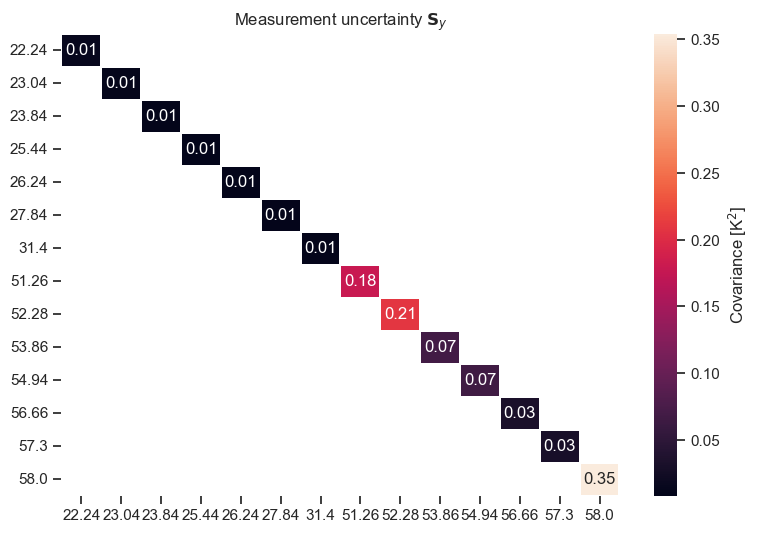

In [82]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(
    S_y.where(S_y > 0), 
    annot=True, 
    fmt='.2f', 
    ax=ax, 
    linewidths=.05, 
    cbar_kws={'label':'Covariance [K$^2$]'}
)
ax.set_title(r'Measurement uncertainty $\mathbf{S}_{y}$')

In [83]:
x_a = x_mean.sel(season='JJA').to_pandas()[x_vars]
S_a = x_cov.sel(season='JJA').to_pandas().loc[x_vars, x_vars]

In [84]:
singularMatrix = np.array([[1,0,0], [1,0,1e-50], [1,1e-50,0]])
np.linalg.inv(singularMatrix)

array([[ 1.e+00,  0.e+00,  0.e+00],
       [-1.e+50,  0.e+00,  1.e+50],
       [-1.e+50,  1.e+50,  0.e+00]])

In [85]:
x_truth

state
00000_t    296.950000
00148_t    297.550000
00561_t    294.750000
01091_t    290.750000
01821_t    283.750000
02595_t    282.750000
03289_t    280.950000
03393_t    278.950000
03482_t    267.650000
03873_t    267.050000
04350_t    266.850000
04827_t    266.850000
05297_t    262.050000
05748_t    261.650000
06145_t    260.250000
06485_t    257.850000
06718_t    256.650000
06928_t    254.250000
07060_t    243.050000
07209_t    242.850000
00000_q      1.992153
00148_q      1.907758
00561_q      1.941071
01091_q      1.928082
01821_q      1.861523
02595_q      1.878528
03289_q      1.955384
03393_q      1.862314
03482_q      1.993400
03873_q      2.000000
04350_q      0.001534
04827_q      2.000000
05297_q      2.000000
05748_q      0.008018
06145_q      1.954079
06485_q      1.949474
06718_q      1.930544
06928_q      1.612409
07060_q      1.385191
07209_q      1.383994
Name: 2022-06-25 00:00:00, dtype: float64

In [86]:
import pandas as pd

# Assuming 'series' is your pandas Series
has_nan = x_truth.isna().any()

# Print whether there are NaN values
print("Are there any NaN values in the series?", has_nan)


Are there any NaN values in the series? False


In [87]:
try:
    pyOE.invertMatrix(singularMatrix)
except Exception as err:
    traceback.print_tb(err.__traceback__)

  File "C:\Users\angsh\AppData\Local\Temp\ipykernel_13748\384370707.py", line 2, in <module>
    pyOE.invertMatrix(singularMatrix)
  File "C:\Users\angsh\anaconda3\envs\pyvenv\lib\site-packages\pyOptimalEstimation\pyOEcore.py", line 1485, in invertMatrix
    raise ValueError("Found singular matrix", UserWarning)


In [88]:
forwardKwArgs = dict(
    pressure=pressure.loc['JJA'].values,
    zenithAngle=0,
    frequencies=frequencies
)

In [89]:
x_truth

state
00000_t    296.950000
00148_t    297.550000
00561_t    294.750000
01091_t    290.750000
01821_t    283.750000
02595_t    282.750000
03289_t    280.950000
03393_t    278.950000
03482_t    267.650000
03873_t    267.050000
04350_t    266.850000
04827_t    266.850000
05297_t    262.050000
05748_t    261.650000
06145_t    260.250000
06485_t    257.850000
06718_t    256.650000
06928_t    254.250000
07060_t    243.050000
07209_t    242.850000
00000_q      1.992153
00148_q      1.907758
00561_q      1.941071
01091_q      1.928082
01821_q      1.861523
02595_q      1.878528
03289_q      1.955384
03393_q      1.862314
03482_q      1.993400
03873_q      2.000000
04350_q      0.001534
04827_q      2.000000
05297_q      2.000000
05748_q      0.008018
06145_q      1.954079
06485_q      1.949474
06718_q      1.930544
06928_q      1.612409
07060_q      1.385191
07209_q      1.383994
Name: 2022-06-25 00:00:00, dtype: float64

In [90]:
# forwardKwArgs = dict(
#     pressure=pressure.loc['SON'].values,
#     zenithAngle=0,
#     frequencies=frequencies
# )

y_obs = forwardRT(x_truth, **forwardKwArgs)
y_obs = pd.Series(y_obs, index=y_vars)
assert np.all(np.isfinite(y_obs))

In [91]:
oe_ref = pyOE.optimalEstimation(
    x_vars,       # state variable names
    x_a,          # a priori
    S_a,          # a priori uncertainty
    y_vars,       # measurement variable names
    y_obs,        # observations
    S_y,      # observation uncertainty
    forwardRT,    # forward Operator
    forwardKwArgs=forwardKwArgs,  # additional function arguments
    x_truth=x_truth,              # true profile
)


In [92]:
oe_ref.doRetrieval()

0.47 s, iteration 1, degrees of freedom: 1.99 of 40, converged (x-space):  0.418
0.68 s, iteration 2, degrees of freedom: 1.99 of 40, done.  0.000


True

In [93]:
print(oe_ref.x_op[:10])
print(oe_ref.S_op[:10])

00000_q      1.979690
00000_t    296.967805
00148_q      1.966129
00148_t    297.486562
00561_q      1.953931
00561_t    295.707670
01091_q      1.945630
01091_t    293.079186
01821_q      1.928436
01821_t    289.462200
dtype: float64
          00000_q   00000_t   00148_q   00148_t   00561_q   00561_t   01091_q  \
00000_q  0.002953 -0.000226  0.000605  0.000766  0.000584  0.001679  0.000534   
00000_t -0.000226  0.011895  0.000010 -0.027754 -0.000116 -0.012419 -0.000219   
00148_q  0.000605  0.000010  0.003302 -0.000063  0.002247  0.010876  0.002629   
00148_t  0.000766 -0.027754 -0.000063  0.082686  0.000507 -0.037600  0.000429   
00561_q  0.000584 -0.000116  0.002247  0.000507  0.004018 -0.002910  0.003284   
00561_t  0.001679 -0.012419  0.010876 -0.037600 -0.002910  3.948772  0.017807   
01091_q  0.000534 -0.000219  0.002629  0.000429  0.003284  0.017807  0.007581   
01091_t  0.000574 -0.021202  0.005901 -0.027184  0.002906  4.644222  0.045557   
01821_q  0.000490 -0.000289  0.00147

In [94]:
print(oe_ref.x_op_err[:10])

00000_q    0.054339
00000_t    0.109063
00148_q    0.057461
00148_t    0.287551
00561_q    0.063386
00561_t    1.987152
01091_q    0.087070
01091_t    3.256661
01821_q    0.126111
01821_t    6.330011
dtype: float64


In [95]:
print('total', oe_ref.dgf)
print(oe_ref.dgf_x[:10])

total 1.9929581854460305
00000_q    1.483242e-04
00000_t    9.914067e-01
00148_q    3.624795e-04
00148_t    9.468777e-01
00561_q    3.715947e-05
00561_t    5.404336e-02
01091_q    2.763016e-07
01091_t    8.213792e-05
01821_q    1.654548e-10
01821_t    3.381163e-08
dtype: float64


In [96]:
help(oe_ref)

Help on optimalEstimation in module pyOptimalEstimation.pyOEcore object:

class optimalEstimation(builtins.object)
 |  optimalEstimation(x_vars, x_a, S_a, y_vars, y_obs, S_y, forward, userJacobian=None, x_truth=None, b_vars=[], b_p=[], S_b=[[]], x_lowerLimit={}, x_upperLimit={}, useFactorInJac=False, gammaFactor=None, perturbation=0.1, disturbance=None, convergenceFactor=10, convergenceTest='x', forwardKwArgs={}, multipleForwardKwArgs=None, verbose=None)
 |  
 |  The core optimalEstimation class, which contains all required parameters.
 |  See [1]_ for an extensive introduction into Optimal Estimation theory, 
 |  [2]_ discusses this library
 |  
 |  Parameters
 |  ----------
 |  x_vars : list of str
 |      names of the elements of state vector x.
 |  x_a : pd.Series or list or np.ndarray
 |      prior information of state x.
 |  S_a : pd.DataFrame or list or np.ndarray
 |      covariance matrix of state x.
 |  y_vars : list of str
 |      names of the elements of state vector x
 |  y

C:\Users\angsh\anaconda3\envs\pyvenv\lib\site-packages\pyOptimalEstimation\pyOEcore.py:1339: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sp4.set_xticklabels(xlabels)


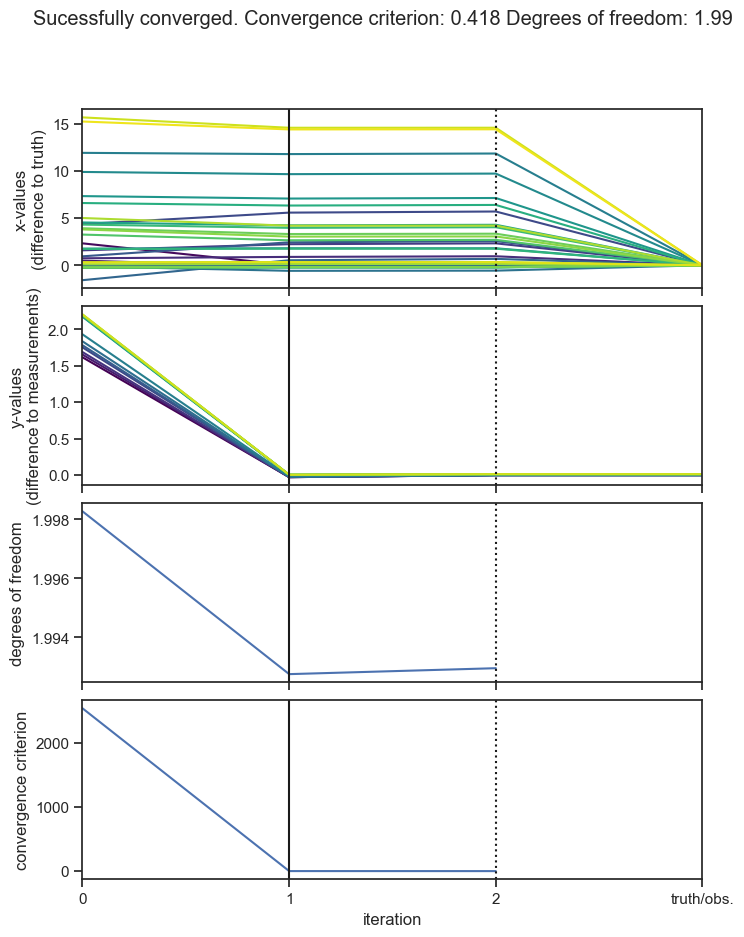

In [97]:
fig = oe_ref.plotIterations(legend=False, mode='difference')

In [98]:
oe_ref.x_op

00000_q      1.979690
00000_t    296.967805
00148_q      1.966129
00148_t    297.486562
00561_q      1.953931
00561_t    295.707670
01091_q      1.945630
01091_t    293.079186
01821_q      1.928436
01821_t    289.462200
02595_q      1.892768
02595_t    285.314956
03289_q      1.859101
03289_t    281.630518
03393_q      1.839724
03393_t    278.380423
03482_q      1.832475
03482_t    279.522581
03873_q      1.818146
03873_t    276.790507
04350_q      1.809504
04350_t    273.997081
04827_q      1.790033
04827_t    271.151317
05297_q      1.776048
05297_t    268.460279
05748_q      1.770441
05748_t    265.691504
06145_q      1.745473
06145_t    262.952165
06485_q      1.754400
06485_t    261.204784
06718_q      1.740515
06718_t    259.713096
06928_q      1.742120
06928_t    258.463455
07060_q      1.732657
07060_t    257.660899
07209_q      1.710489
07209_t    257.294452
dtype: float64

Text(0.5, 1.0, '$\\mathbf{S}_{op}$ Humidity')

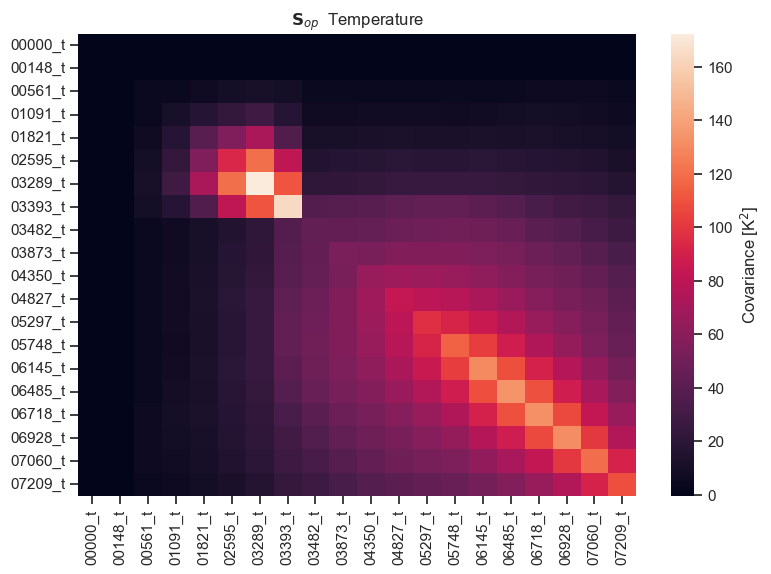

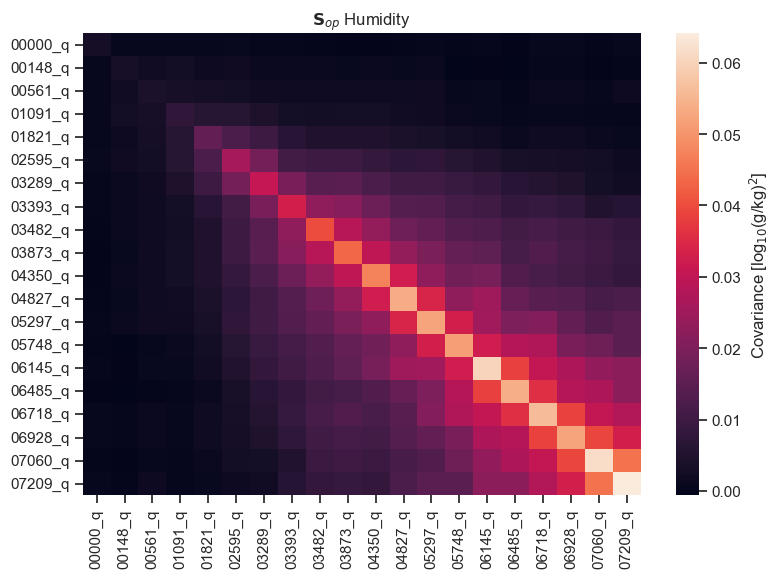

In [99]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(oe_ref.S_op .iloc[1::2, 1::2], ax=ax, cbar_kws={'label':'Covariance [K$^2$]'})
ax.set_title('$\mathbf{S}_{op}$  Temperature')

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(oe_ref.S_op .iloc[::2, ::2], ax=ax, cbar_kws={'label':'Covariance [log$_{10}$(g/kg)$^2$]'})
ax.set_title('$\mathbf{S}_{op}$ Humidity')

In [100]:
oe_ref.x_op_err

00000_q     0.054339
00000_t     0.109063
00148_q     0.057461
00148_t     0.287551
00561_q     0.063386
00561_t     1.987152
01091_q     0.087070
01091_t     3.256661
01821_q     0.126111
01821_t     6.330011
02595_q     0.161773
02595_t     9.636148
03289_q     0.175247
03289_t    13.127571
03393_q     0.181585
03393_t    12.793448
03482_q     0.199721
03482_t     6.591942
03873_q     0.208625
03873_t     7.282319
04350_q     0.217540
04350_t     8.080109
04827_q     0.231567
04827_t     9.130767
05297_q     0.228877
05297_t     9.851248
05748_q     0.226385
05748_t    10.736794
06145_q     0.245551
06145_t    11.397801
06485_q     0.231848
06485_t    11.575909
06718_q     0.236957
06718_t    11.509770
06928_q     0.229075
06928_t    11.482677
07060_q     0.248673
07060_t    10.930251
07209_q     0.253211
07209_t    10.410397
dtype: float64

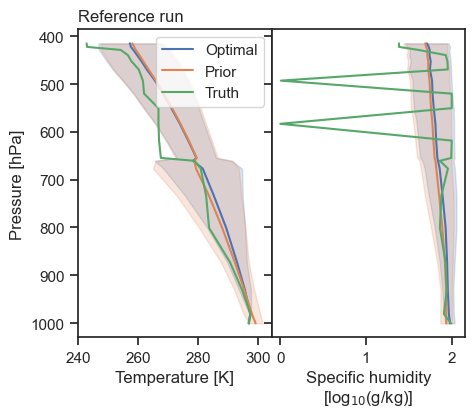

In [101]:
fig = supporting_routines.plotMwrResults(
    oe_ref,
    h=pressure.loc[season] / 100,
    hlabel='Pressure [hPa]',
    title='Reference run')

In [102]:
T_optimal, Q_optimal = supporting_routines.splitTQ(oe_ref.x_op)
T_truth, Q_truth = supporting_routines.splitTQ(oe_ref.x_truth)

print('RMS X Temperature: %g [K]'% np.sqrt(np.mean((T_optimal - T_truth)**2)))
print('RMS X Humidity: %g [log$_{10}$(g/kg)]'% np.sqrt(np.mean((10**Q_optimal - 10**Q_truth)**2)))
print('RMS Y %g [K]'% np.sqrt(np.mean((oe_ref.y_obs - oe_ref.y_op)**2)))

RMS X Temperature: 6.62193 [K]
RMS X Humidity: 30.1516 [log$_{10}$(g/kg)]
RMS Y 0.00824832 [K]


In [103]:
chiSquareTest = oe_ref.chiSquareTest(significance=0.05)

Warning. Singular Matrix with rank 13 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 2 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 3 instead of 40. (This is typically safe to ignore)       


In [104]:
print('\nTests passed:\n' ,chiSquareTest[0])


Tests passed:
 chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool


In [105]:
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_ref.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

Linearity test passed:  True


In [106]:
x_a = x_mean.sel(season='JJA').to_pandas()  # as before
S_a = x_cov.sel(season='JJA')  # as before
S_a_diag = np.diag(np.diag(S_a))

In [107]:
oe_diag = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a_diag,
    y_vars,
    y_obs,
    S_y,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
)
oe_diag.doRetrieval()

0.48 s, iteration 1, degrees of freedom: 2.04 of 40, converged (x-space):  0.203
0.71 s, iteration 2, degrees of freedom: 2.04 of 40, done.  0.000


True

In [108]:
oe_diag.dgf, oe_ref.dgf

(2.0377186221599013, 1.9929581854460305)

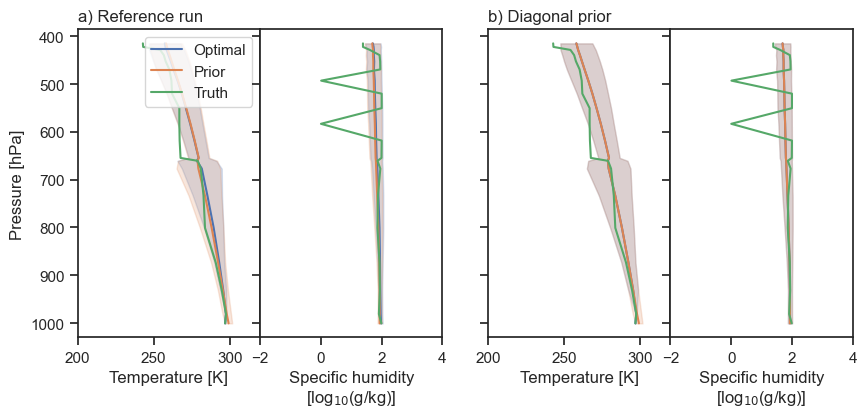

In [109]:
fig = supporting_routines.plotMwrResults(
    oe_ref,
    oe2 = oe_diag,
    h=pressure.loc[season] / 100,
    hlabel='Pressure [hPa]',
    title='a) Reference run',
    title2='b) Diagonal prior',
    xlimT = (200, 320),
    xlimH = (-2,4),
)


In [110]:
print('Reference run:')
supporting_routines.print_mwr_rms(oe_ref)
print('Diagonal prior:')
supporting_routines.print_mwr_rms(oe_diag)


Reference run:
RMS X Temperature: 6.62193 [K]
RMS X Humidity: 30.1516 [log$_{10}$(g/kg)]
RMS Y 0.00824832 [K]
Diagonal prior:
RMS X Temperature: 6.89039 [K]
RMS X Humidity: 30.7444 [log$_{10}$(g/kg)]
RMS Y 0.0031616 [K]


In [111]:
print(oe_diag.chiSquareTest()[0])

Warning. Singular Matrix with rank 13 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 3 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 3 instead of 40. (This is typically safe to ignore)       
chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool


In [112]:
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_diag.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

Linearity test passed:  True


In [113]:
x_a = x_mean.sel(season='SON').to_pandas()
S_a = x_cov.sel(season='SON').to_pandas()
forwardKwArgs = dict(
    pressure=pressure.loc['SON'].values,
    zenithAngle=0,
    frequencies=frequencies
)

In [114]:
oe_sum = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a,
    y_vars,
    y_obs,
    S_y,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
)
oe_sum.doRetrieval()

0.39 s, iteration 1, degrees of freedom: 1.98 of 40, converged (x-space):  0.326
0.59 s, iteration 2, degrees of freedom: 1.98 of 40, done.  0.000


True

In [115]:
oe_ref.dgf, oe_sum.dgf

(1.9929581854460305, 1.9791333059809388)

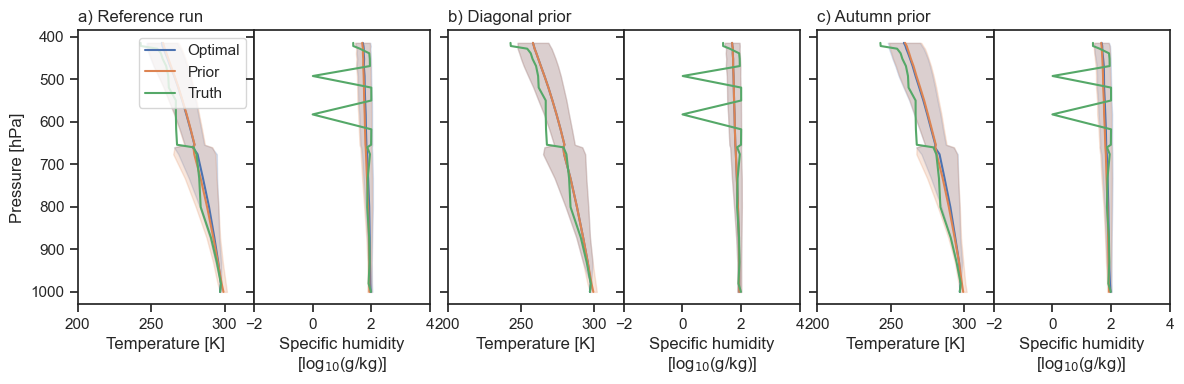

In [116]:
fig = supporting_routines.plotMwrResults(
    oe_ref,
    oe2 = oe_diag,
    oe3 = oe_sum,
    h=pressure.loc['JJA'] / 100,
    hlabel='Pressure [hPa]',
    title='a) Reference run',
    title2='b) Diagonal prior',
    title3='c) Autumn prior',
    xlimT = (200, 320),
    xlimH = (-2,4),
)
fig.tight_layout()
fig.savefig('Figure2.png', dpi=200)
fig.savefig('Figure2.pdf')

In [117]:
print('Reference run:')
supporting_routines.print_mwr_rms(oe_ref)
print('Autumn prior:')
supporting_routines.print_mwr_rms(oe_sum)

Reference run:
RMS X Temperature: 6.62193 [K]
RMS X Humidity: 30.1516 [log$_{10}$(g/kg)]
RMS Y 0.00824832 [K]
Autumn prior:
RMS X Temperature: 7.66489 [K]
RMS X Humidity: 29.8354 [log$_{10}$(g/kg)]
RMS Y 0.00933524 [K]


In [118]:
print(oe_sum.chiSquareTest()[0])

Warning. Singular Matrix with rank 13 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 2 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 3 instead of 40. (This is typically safe to ignore)       
chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool


In [119]:
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_sum.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

Linearity test passed:  True


In [120]:
S_b = pd.DataFrame(
    np.array([
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.3, 0.1, 0.0, 0.0, 0.0, 0.0],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 3.0, 3.3, 1.2, 0.1, 0.0, 0.0, 0.0],
        [0.3, 0.3, 0.4, 0.4, 0.4, 0.5, 0.7, 8.7, 9.2, 3.3, 0.3, 0.0, 0.0, 0.0],
        [0.3, 0.4, 0.4, 0.4, 0.5, 0.5, 0.7, 8.2, 8.7, 3.0, 0.3, 0.0, 0.0, 0.0],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.7, 0.7, 0.2, 0.0, 0.0, 0.0, 0.0],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.5, 0.5, 0.2, 0.0, 0.0, 0.0, 0.0],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.5, 0.4, 0.1, 0.0, 0.0, 0.0, 0.0],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.4, 0.4, 0.1, 0.0, 0.0, 0.0, 0.0],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.4, 0.4, 0.1, 0.0, 0.0, 0.0, 0.0],
        [0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.4, 0.3, 0.1, 0.0, 0.0, 0.0, 0.0],
        [0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.3, 0.3, 0.1, 0.0, 0.0, 0.0, 0.0],
    ]),
    index=frequencies[::-1],
    columns=frequencies)

Text(0.5, 1.0, "Model uncertainty $\\mathbf{S}_{b}$' (Cimini et al. 2018)")

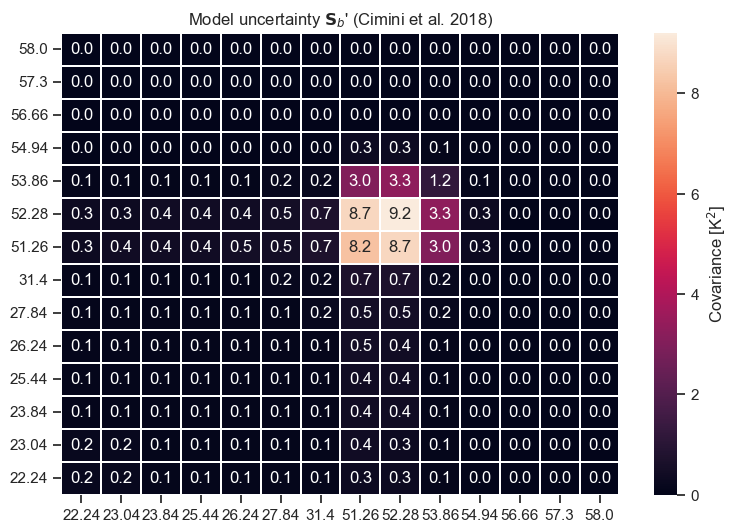

In [121]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(
    S_b, 
    annot=True, 
    linewidths=.05, 
    ax=ax, 
    fmt='.1f', 
    cbar_kws={'label':'Covariance [K$^2$]'}
)
ax.set_title(r"Model uncertainty $\mathbf{S}_{b}$' (Cimini et al. 2018)")

In [122]:
x_a = x_mean.sel(season='JJA').to_pandas() # as for the reference run
S_a = x_cov.sel(season='JJA').to_pandas() # as for the reference run
S_e = S_y + S_b

assert (S_e.values == S_e.values.T).all()

forwardKwArgs = dict(
    pressure=pressure.loc['JJA'].values,
    zenithAngle=0,
    frequencies=frequencies
)

oe_b = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a,
    y_vars,
    y_obs,
    S_e,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
)
oe_b.doRetrieval()

0.40 s, iteration 1, degrees of freedom: 1.82 of 40, converged (x-space):  0.012
0.59 s, iteration 2, degrees of freedom: 1.82 of 40, done.  0.000


True

In [123]:
oe_ref.dgf, oe_b.dgf

(1.9929581854460305, 1.8199117298529142)

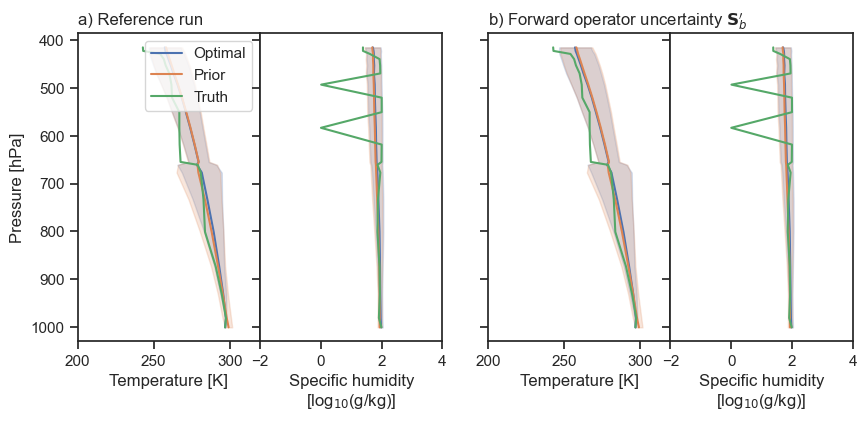

In [124]:
fig = supporting_routines.plotMwrResults(
    oe_ref,
    oe2 = oe_b,
    h=pressure.loc['JJA'] / 100,
    hlabel='Pressure [hPa]',
    title='a) Reference run',
    title2="b) Forward operator uncertainty $\mathbf{S}_b'$",
    xlimT = (200, 320),
    xlimH = (-2,4),
)

In [125]:
print('Reference run:')
supporting_routines.print_mwr_rms(oe_ref)
print('Concidering forward model error:')
supporting_routines.print_mwr_rms(oe_b)


Reference run:
RMS X Temperature: 6.62193 [K]
RMS X Humidity: 30.1516 [log$_{10}$(g/kg)]
RMS Y 0.00824832 [K]
Concidering forward model error:
RMS X Temperature: 6.52499 [K]
RMS X Humidity: 30.1545 [log$_{10}$(g/kg)]
RMS Y 0.0337889 [K]


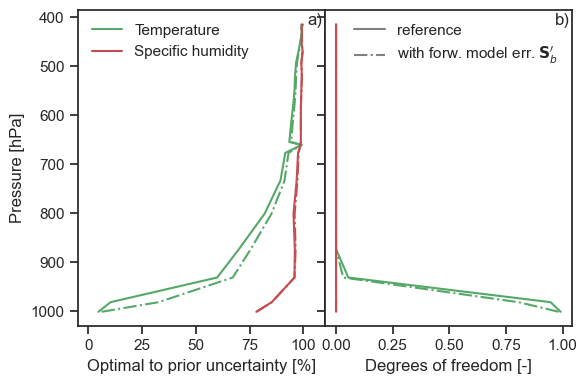

In [126]:
fig = supporting_routines.plot_uncertainty_dof(
    oe_ref, oe_b, 'with forw. model err. $\mathbf{S}_b\'$',
    pressure.loc['JJA'] / 100,
)
fig.tight_layout()
fig.subplots_adjust(wspace=0)
fig.savefig('Figure3.png', dpi=200)
fig.savefig('Figure3.pdf')

In [127]:
((oe_b.x_op_err/oe_b.x_a_err) - (oe_ref.x_op_err/oe_ref.x_a_err)).max() * 100

22.34131074820273

In [128]:
print('Change in degrees of freedom for temperature variables %g' %
      (supporting_routines.splitTQ(oe_ref.dgf_x)[0].sum() -
       supporting_routines.splitTQ(oe_b.dgf_x)[0].sum()))
print('Change in degrees of freedom for humidity variables %g' %
      (supporting_routines.splitTQ(oe_ref.dgf_x)[1].sum() -
       supporting_routines.splitTQ(oe_b.dgf_x)[1].sum()))

Change in degrees of freedom for temperature variables 0.172696
Change in degrees of freedom for humidity variables 0.000350465


In [129]:
print(oe_b.chiSquareTest()[0])
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_ref.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

Warning. Singular Matrix with rank 2 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 3 instead of 40. (This is typically safe to ignore)       
chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool
Linearity test passed:  True


In [130]:
x_a = x_mean.sel(season='JJA').to_pandas() # as reference
S_a = x_cov.sel(season='JJA').to_pandas() # as reference
S_e = S_y * 4
forwardKwArgs = dict(
    pressure=pressure.loc['JJA'].values,
    zenithAngle=0,
    frequencies=frequencies
)

oe_double = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a,
    y_vars,
    y_obs,
    S_e,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
)
oe_double.doRetrieval()

0.40 s, iteration 1, degrees of freedom: 1.91 of 40, converged (x-space):  0.093
0.60 s, iteration 2, degrees of freedom: 1.91 of 40, done.  0.000


True

In [131]:
S_e = S_y / 4

oe_half = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a,
    y_vars,
    y_obs,
    S_e,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
)
oe_half.doRetrieval()

0.40 s, iteration 1, degrees of freedom: 2.06 of 40, converged (x-space):  1.720
0.60 s, iteration 2, degrees of freedom: 2.06 of 40, done.  0.000


True

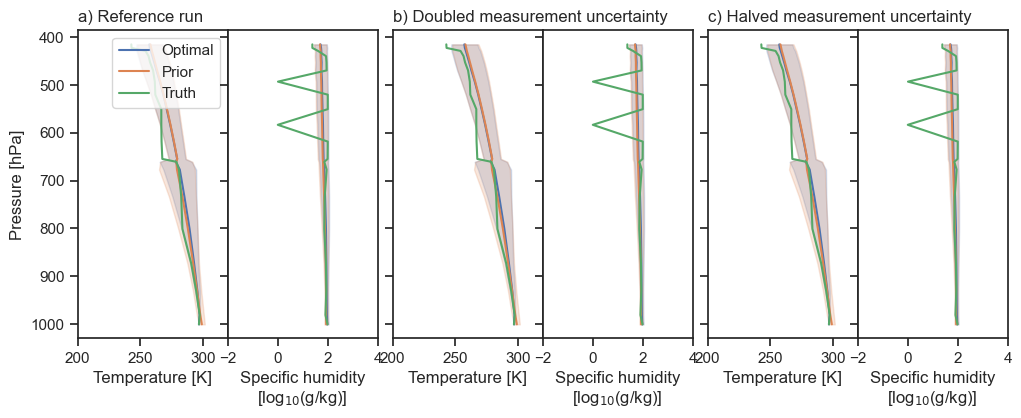

In [132]:
fig = supporting_routines.plotMwrResults(
    oe_ref,
    oe2 = oe_double,
    oe3 = oe_half,
    h=pressure.loc[season] / 100,
    hlabel='Pressure [hPa]',
    title='a) Reference run',
    title2='b) Doubled measurement uncertainty',
    title3='c) Halved measurement uncertainty',
    xlimT = (200, 320),
    xlimH = (-2, 4),
)

In [133]:
print('### Reference run ###')
T_optimal, Q_optimal = supporting_routines.splitTQ(oe_ref.x_op)
T_truth, Q_truth = supporting_routines.splitTQ(oe_ref.x_a)
print('Temperature RMS difference to x_a: %g [K]'% np.sqrt(np.mean((T_optimal - T_truth)**2)))
print('Humidity RMS difference to x_a: %g [log10(g/kg)]'% np.sqrt(np.mean((10**Q_optimal - 10**Q_truth)**2)))

print('\n### Doubled measurement uncertainty ###')
T_optimal, Q_optimal = supporting_routines.splitTQ(oe_double.x_op)
T_truth, Q_truth = supporting_routines.splitTQ(oe_double.x_a)
print('Temperature RMS difference to x_a: %g [K]'% np.sqrt(np.mean((T_optimal - T_truth)**2)))
print('Humidity RMS difference to x_a: %g [log10(g/kg)]'% np.sqrt(np.mean((10**Q_optimal - 10**Q_truth)**2)))

print('\n### Halved measurement uncertainty ###')
T_optimal, Q_optimal = supporting_routines.splitTQ(oe_half.x_op)
T_truth, Q_truth = supporting_routines.splitTQ(oe_half.x_a)
print('Temperature RMS difference to x_a: %g [K]'% np.sqrt(np.mean((T_optimal - T_truth)**2)))
print('Humidity RMS difference to x_a: %g [log10(g/kg)]'% np.sqrt(np.mean((10**Q_optimal - 10**Q_truth)**2)))


### Reference run ###
Temperature RMS difference to x_a: 0.999238 [K]
Humidity RMS difference to x_a: 5.01599 [log10(g/kg)]

### Doubled measurement uncertainty ###
Temperature RMS difference to x_a: 0.952797 [K]
Humidity RMS difference to x_a: 4.91012 [log10(g/kg)]

### Halved measurement uncertainty ###
Temperature RMS difference to x_a: 1.00332 [K]
Humidity RMS difference to x_a: 4.97711 [log10(g/kg)]


Change in degrees of freedom for halved measurement uncertainties -0.0668409
Change in degrees of freedom for doubled measurement uncertainties 0.0797464


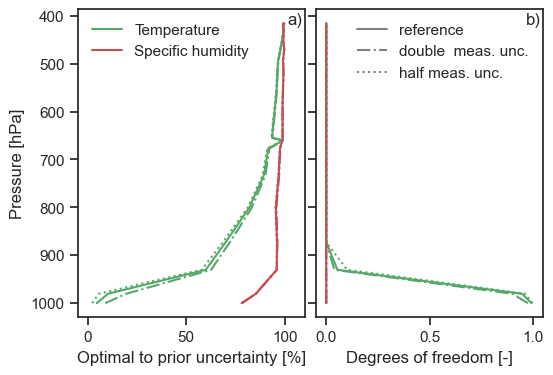

In [134]:
fig = supporting_routines.plot_uncertainty_dof(
    oe_ref, oe_double, 'double  meas. unc.',
    pressure.loc['JJA'] / 100,
    oe3=oe_half, label3 = 'half meas. unc.'
)

print('Change in degrees of freedom for halved measurement uncertainties %g' %
      (oe_ref.dgf - oe_half.dgf))
print('Change in degrees of freedom for doubled measurement uncertainties %g' %
      (oe_ref.dgf - oe_double.dgf))


In [135]:
print(oe_double.chiSquareTest()[0])
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_double.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

Warning. Singular Matrix with rank 2 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 3 instead of 40. (This is typically safe to ignore)       
chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool
Linearity test passed:  True


In [136]:
print(oe_half.chiSquareTest()[0])
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_half.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

Warning. Singular Matrix with rank 13 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 3 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 4 instead of 40. (This is typically safe to ignore)       
chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool
Linearity test passed:  True


Text(0.5, 1.0, 'Measurement uncertainty $\\mathbf{S}_{y}$ including non-diagonal elements.')

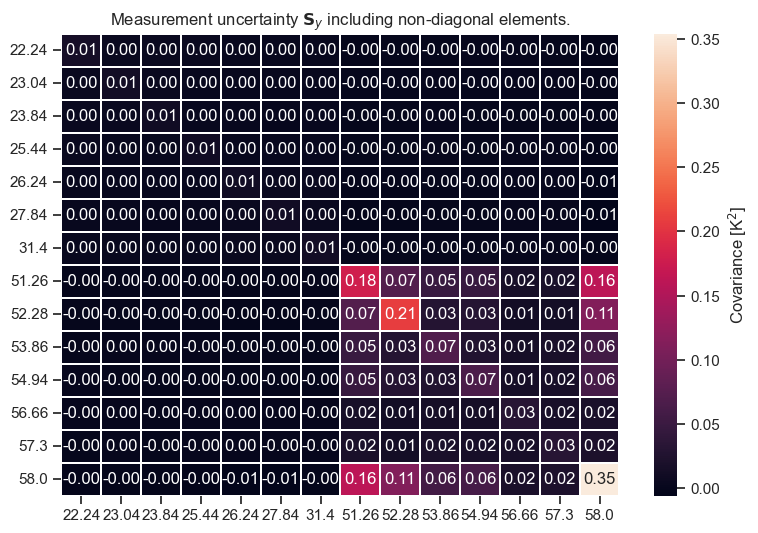

In [137]:
S_y_nondiag = np.array(
    [[
        1.4464e-02, 3.1175e-03, 3.2584e-03, 2.7590e-03, 2.1494e-03, 1.8121e-03,
        2.3444e-03, -2.8253e-03, -1.1941e-03, -7.1487e-04, -7.1019e-05,
        -1.3676e-04, -3.0526e-04, -3.8639e-03
    ],
     [
         3.1175e-03, 1.1803e-02, 2.5663e-03, 2.1457e-03, 1.5946e-03,
         1.6916e-03, 1.8975e-03, -7.3124e-04, -4.7555e-04, 1.8126e-04,
         -8.1855e-04, 4.6114e-04, 3.1963e-06, -2.5867e-03
     ],
     [
         3.2584e-03, 2.5663e-03, 1.0841e-02, 2.3239e-03, 1.1311e-03,
         1.1062e-03, 1.5767e-03, -6.4790e-04, -1.3201e-03, 1.7669e-04,
         -1.0165e-03, -4.5220e-04, -5.8443e-04, -1.9019e-03
     ],
     [
         2.7590e-03, 2.1457e-03, 2.3239e-03, 8.4360e-03, 1.3579e-03,
         1.5264e-03, 1.4780e-03, -8.7548e-04, -1.5626e-03, -1.7332e-04,
         -4.6437e-04, -1.8432e-04, -1.7265e-04, -3.8433e-03
     ],
     [
         2.1494e-03, 1.5946e-03, 1.1311e-03, 1.3579e-03, 1.0352e-02,
         3.3218e-03, 3.1755e-03, -2.2734e-03, -2.3389e-03, -1.2198e-03,
         -7.2950e-04, 2.0710e-04, 2.5822e-04, -5.9091e-03
     ],
     [
         1.8121e-03, 1.6916e-03, 1.1062e-03, 1.5264e-03, 3.3218e-03,
         1.0172e-02, 3.2801e-03, -2.0768e-03, -2.1563e-03, -4.6483e-04,
         -1.6465e-03, 9.4358e-05, -2.8649e-04, -5.4612e-03
     ],
     [
         2.3444e-03, 1.8975e-03, 1.5767e-03, 1.4780e-03, 3.1755e-03,
         3.2801e-03, 1.1026e-02, -3.1658e-04, -1.1692e-03, -7.5206e-04,
         -1.0920e-03, -3.7627e-05, -2.0978e-04, -1.7690e-03
     ],
     [
         -2.8253e-03, -7.3124e-04, -6.4790e-04, -8.7548e-04, -2.2734e-03,
         -2.0768e-03, -3.1658e-04, 1.7896e-01, 7.2248e-02, 4.8262e-02,
         4.6481e-02, 1.6283e-02, 1.8456e-02, 1.6027e-01
     ],
     [
         -1.1941e-03, -4.7555e-04, -1.3201e-03, -1.5626e-03, -2.3389e-03,
         -2.1563e-03, -1.1692e-03, 7.2248e-02, 2.0847e-01, 2.8595e-02,
         2.9832e-02, 1.1226e-02, 1.3614e-02, 1.1240e-01
     ],
     [
         -7.1487e-04, 1.8126e-04, 1.7669e-04, -1.7332e-04, -1.2198e-03,
         -4.6483e-04, -7.5206e-04, 4.8262e-02, 2.8595e-02, 6.9126e-02,
         2.5361e-02, 1.3994e-02, 1.8141e-02, 5.6810e-02
     ],
     [
         -7.1019e-05, -8.1855e-04, -1.0165e-03, -4.6437e-04, -7.2950e-04,
         -1.6465e-03, -1.0920e-03, 4.6481e-02, 2.9832e-02, 2.5361e-02,
         6.5223e-02, 1.3962e-02, 1.6982e-02, 6.0963e-02
     ],
     [
         -1.3676e-04, 4.6114e-04, -4.5220e-04, -1.8432e-04, 2.0710e-04,
         9.4358e-05, -3.7627e-05, 1.6283e-02, 1.1226e-02, 1.3994e-02,
         1.3962e-02, 3.1456e-02, 1.7948e-02, 1.8197e-02
     ],
     [
         -3.0526e-04, 3.1963e-06, -5.8443e-04, -1.7265e-04, 2.5822e-04,
         -2.8649e-04, -2.0978e-04, 1.8456e-02, 1.3614e-02, 1.8141e-02,
         1.6982e-02, 1.7948e-02, 3.0822e-02, 2.1850e-02
     ],
     [
         -3.8639e-03, -2.5867e-03, -1.9019e-03, -3.8433e-03, -5.9091e-03,
         -5.4612e-03, -1.7690e-03, 1.6027e-01, 1.1240e-01, 5.6810e-02,
         6.0963e-02, 1.8197e-02, 2.1850e-02, 3.5390e-01
     ]])

S_y_nondiag = pd.DataFrame(
    S_y_nondiag,
    index=y_vars,
    columns=y_vars,
)
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(S_y_nondiag, annot=True, fmt='.2f', ax=ax, linewidths=.05, cbar_kws={'label':'Covariance [K$^2$]'})

ax.set_title(r'Measurement uncertainty $\mathbf{S}_{y}$ including non-diagonal elements.')



In [138]:
x_a = x_mean.sel(season='JJA').to_pandas()[x_vars] # as reference run
S_a = x_cov.sel(season='JJA').to_pandas().loc[x_vars, x_vars] # as reference run
S_e = S_y_nondiag

forwardKwArgs = dict(
    pressure=pressure.loc['JJA'].values,
    zenithAngle=0,
    frequencies=frequencies
)

oe_nondiag = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a,
    y_vars,
    y_obs,
    S_e,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
)
oe_nondiag.doRetrieval()

0.43 s, iteration 1, degrees of freedom: 1.97 of 40, converged (x-space):  0.193
0.62 s, iteration 2, degrees of freedom: 1.97 of 40, done.  0.000


True

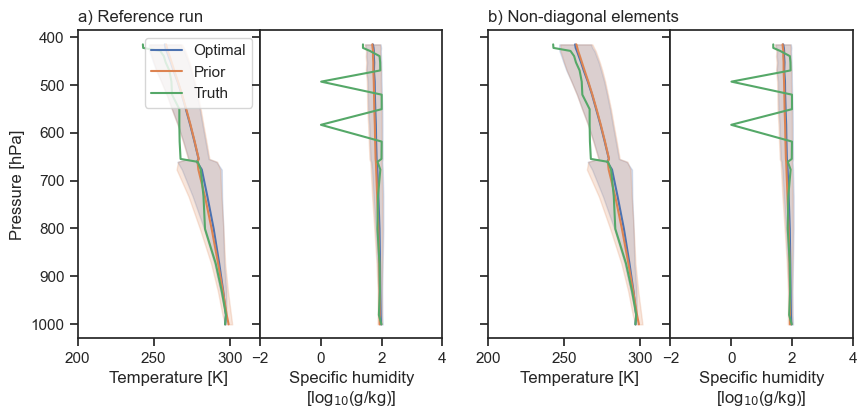

In [139]:
fig = supporting_routines.plotMwrResults(
    oe_ref,
    oe2 = oe_nondiag,
    h=pressure.loc[season] / 100,
    hlabel='Pressure [hPa]',
    title='a) Reference run',
    title2='b) Non-diagonal elements',
    xlimT = (200, 320),
    xlimH = (-2,4),
)

In [140]:
oe_nondiag.dgf - oe_ref.dgf

-0.018326009081867545

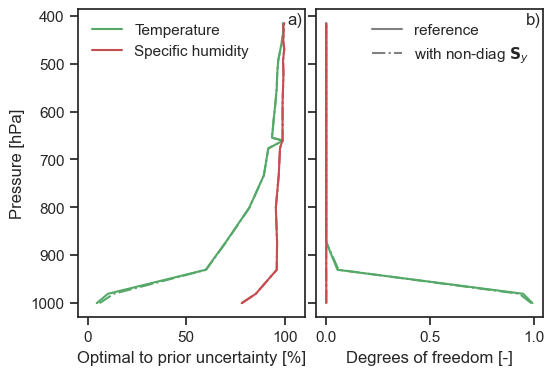

In [141]:
fig = supporting_routines.plot_uncertainty_dof(
    oe_ref, oe_nondiag, 'with non-diag $\mathbf{S}_y$',
    pressure.loc['JJA'] / 100,
)

In [142]:
print(oe_nondiag.chiSquareTest()[0])
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_nondiag.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

Warning. Singular Matrix with rank 2 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 3 instead of 40. (This is typically safe to ignore)       
chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool
Linearity test passed:  True


In [143]:
x_a = x_mean.sel(season='JJA').to_pandas()  # as reference run
S_a = x_cov.sel(season='JJA').to_pandas()   # as reference run

In [144]:
oe_testy = pyOE.optimalEstimation(
    x_vars,
    x_a,
    S_a,
    y_vars,
    y_obs,
    S_y,
    forwardRT,
    x_truth=x_truth,
    forwardKwArgs=forwardKwArgs,
    convergenceTest='y'
)
oe_testy.doRetrieval()

0.40 s, iteration 1, degrees of freedom: 1.99 of 40, not converged (y-space):  1448.035
0.58 s, iteration 2, degrees of freedom: 1.99 of 40, converged (y-space):  0.003
0.80 s, iteration 3, degrees of freedom: 1.99 of 40, done.  0.000


True

In [145]:
oe_testy.dgf, oe_ref.dgf

(1.9929589606010434, 1.9929581854460305)

In [146]:
print('Reference run with test in x-space:')
supporting_routines.print_mwr_rms(oe_ref)
print('Test in y-space:')
supporting_routines.print_mwr_rms(oe_testy)


Reference run with test in x-space:
RMS X Temperature: 6.62193 [K]
RMS X Humidity: 30.1516 [log$_{10}$(g/kg)]
RMS Y 0.00824832 [K]
Test in y-space:
RMS X Temperature: 6.62196 [K]
RMS X Humidity: 30.1516 [log$_{10}$(g/kg)]
RMS Y 0.0082531 [K]


In [147]:
print(oe_testy.chiSquareTest()[0])

Warning. Singular Matrix with rank 13 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 2 instead of 14. (This is typically safe to ignore)       
Warning. Singular Matrix with rank 3 instead of 40. (This is typically safe to ignore)       
chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool


In [148]:
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe_testy.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)

Linearity test passed:  True
